In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('blogtext.csv', parse_dates=['date'])

In [201]:
df.head(7)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...


In [73]:
test = df[:100000]

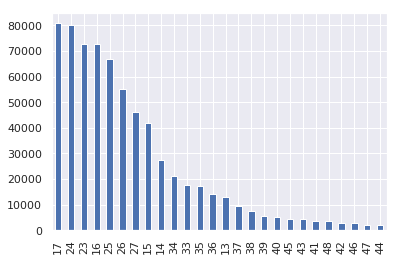

In [13]:
df['age'].value_counts().plot('bar')

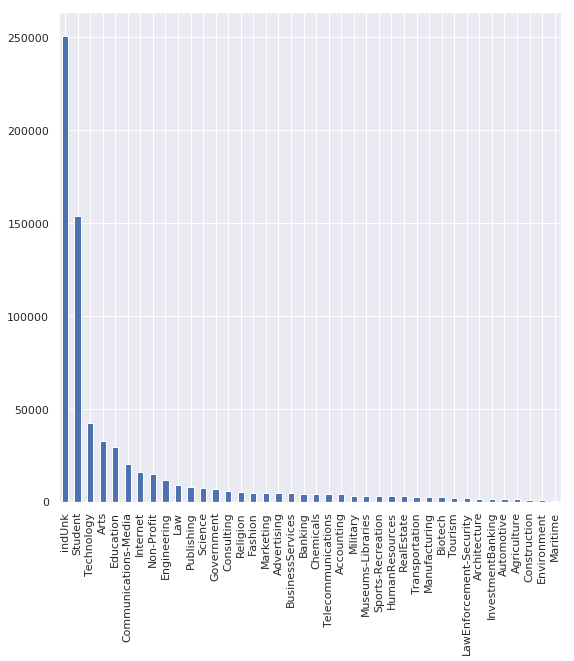

In [18]:
plt.figure(figsize=(9,9))
df['topic'].value_counts().plot('bar')

In [24]:
df.groupby('topic')['age'].agg('median').sort_values(ascending=True)

topic
Student                    16
Sports-Recreation          23
Non-Profit                 23
Maritime                   23
Environment                23
indUnk                     24
Agriculture                24
Arts                       24
RealEstate                 24
Chemicals                  24
Military                   24
Engineering                24
Tourism                    25
Science                    25
HumanResources             25
Accounting                 25
Architecture               25
Banking                    25
Biotech                    25
Construction               25
Communications-Media       25
Education                  25
BusinessServices           25
Museums-Libraries          26
Advertising                26
Telecommunications         26
Technology                 26
Automotive                 26
Publishing                 26
Internet                   26
LawEnforcement-Security    26
Law                        26
InvestmentBanking          26
Cons

# Now to clean up the blogposts

In [165]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
from nltk.stem import WordNetLemmatizer 
stop_words = set(stopwords.words('english')+["can't","got", "urllink", "nbsp"]) 
lemmatizer = WordNetLemmatizer() 

def stop_lems(lst):
    '''Remove stopwords and lemmatize the words'''
    filtered = [w.lower() for w in lst if w not in stop_words]
    lemmatized_output = [lemmatizer.lemmatize(w) for w in filtered]
    return lemmatized_output

In [167]:
test['formatted']=test['text'].map(lambda x: tokenizer.tokenize(x))
test['formatted']=test['formatted'].map(lambda x: stop_lems(x))
#This takes forever.

/home/drew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
test.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [163]:
from nltk.probability import FreqDist
corp = []
for r in test['formatted']:
    corp.append(r)
text = []
for i in corp:
    text.append(str(i).lower())
fdist = FreqDist(text)
fdist.most_common
words = FreqDist(text)
words.most_common

#This data is not being cleaned by the preprocessors.

<bound method Counter.most_common of FreqDist({'[]': 785, '[\'brought\', \'jpservicez\', \'.com:\', \'smart\', \'bargain\', \'shopping\', \'.\', \'please\', \'click\', "\'title\'", \'take\', \'promotion\', \'...\', \'site\', \'feed\']': 153, '[\'sylvain\', "\'s", \'40th\', \'birthday\', \'may\', \'2004\']': 82, "['&nbsp;']": 22, "['brought', 'hakx']": 22, "['.&nbsp;']": 17, "['audblog', 'audio', 'post']": 14, "['test']": 14, "['will', 'post', 'detail', 'soon', '...']": 13, "['duchy', ':', '{duh-chee}', '1', ')', 'territory', 'duke', 'duchess', ';', '2', ')', 'special', 'domain', '.']": 13, ...})>

In [178]:
for lst in test['formatted']:
    if 'nbsp' in lst:
        lst.remove('nbsp')
    if 'urllink' in lst:
        lst.remove('urllink')
    if 'got' in lst:
        lst.remove('got')
#     if ''
test['formattedstr'] = test['formatted'].str.join(' ')
test['formattedstr'] = test['formattedstr'].map(lambda x: x.replace('nbsp', ''))

/home/drew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/drew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [199]:
# def removes(column):
#     for string in column:
#         string.replace('urlink', '').replace('nbsp', '')
# test['formattedstr']=test['formattedstr'].map(lambda x: removes(x))

# test['formatted'][16].remove('urllink')
test['tokenstr'].head()

0    info found (+/- 100 page , 4 .5 mb .pdf file )...
1    these team member : drewes van der laag mail r...
2    in het kader van kernfusie op aarde : maak je ...
3                              testing !!! testing !!!
4    thanks yahoo !'s toolbar i 'capture' url popup...
Name: tokenstr, dtype: object

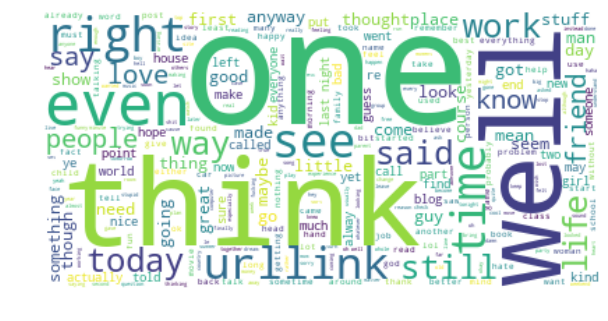

In [170]:
plt.figure(figsize=(10,10))
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(test['tokenstr'].values))# Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
cloud=wordcloud.generate(long_string)# Visualize the word cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#Why is urllink still here?

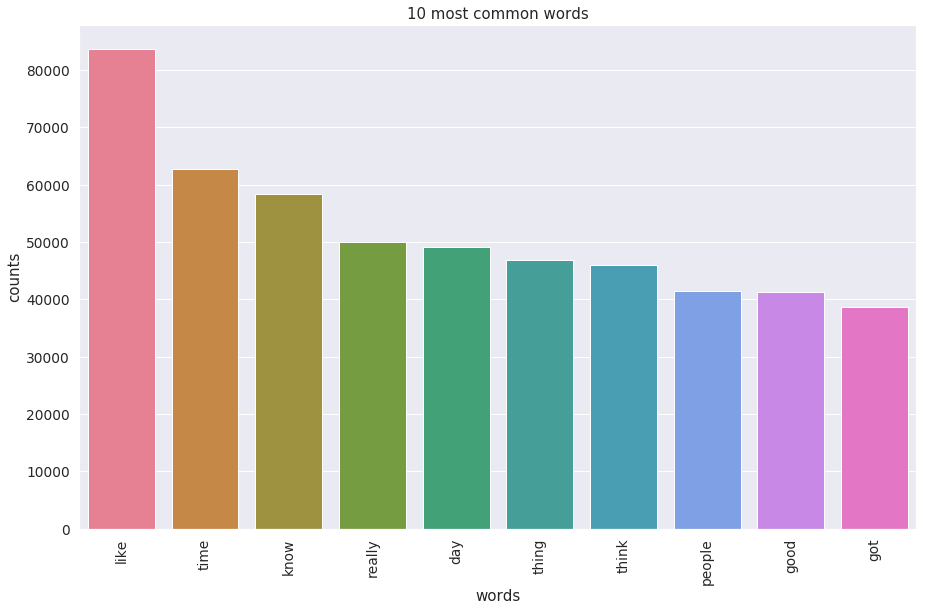

In [171]:
#Taken from Susan Li's Medium article.

from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(test['tokenstr'])# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)
#"Got" should be a stopword.

In [183]:
import gensim
dictionary = gensim.corpora.Dictionary(test['text_tokens'])
bow_corpus = [dictionary.doc2bow(doc) for doc in test['text_tokens']]

0 (+/-
1 )
2 ,
3 .
4 .5
5 .pdf
6 100
7 4
8 file
9 found
10 html


In [192]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 35 ("!") appears 1 time.
Word 159 ("...") appears 1 time.
Word 1205 ("something") appears 1 time.
Word 1445 ("testing") appears 1 time.
Word 1621 ("toot") appears 1 time.


In [194]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4403932460765925),
 (1, 0.06700064813265315),
 (2, 0.010778020388967066),
 (3, 0.008164927312299364),
 (4, 0.21046523495169062),
 (5, 0.37100554455913237),
 (6, 0.17540872162369925),
 (7, 0.10575210144082083),
 (8, 0.19204872065164494),
 (9, 0.10643053999141926),
 (10, 0.2312332930197725),
 (11, 0.2035610985839913),
 (12, 0.1875239456912604),
 (13, 0.30263971962842146),
 (14, 0.2897405849737552),
 (15, 0.10705829859758753),
 (16, 0.14410595008146473),
 (17, 0.29746417175531276),
 (18, 0.15297848749908982),
 (19, 0.2556863588403059),
 (20, 0.11906628721434181)]


In [195]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [196]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.071*"pm" + 0.044*"]:" + 0.037*"*" + 0.037*"|" + 0.028*"):" + 0.016*"am" + 0.012*":" + 0.011*"sbristowsd6" + 0.008*"no" + 0.008*"•"
Topic: 1 
Words: 0.097*"i" + 0.082*"." + 0.061*"," + 0.019*"'t" + 0.016*"'s" + 0.011*"'m" + 0.008*"like" + 0.007*"get" + 0.007*"know" + 0.007*"really"
Topic: 2 
Words: 0.064*"..." + 0.042*".." + 0.028*"!" + 0.012*"u" + 0.012*"im" + 0.010*"like" + 0.009*"go" + 0.008*"," + 0.007*"!!!" + 0.007*"well"
Topic: 3 
Words: 0.075*"." + 0.065*"," + 0.034*"i" + 0.014*"?" + 0.008*"'s" + 0.007*"you" + 0.007*"love" + 0.007*"the" + 0.007*"one" + 0.006*"life"
Topic: 4 
Words: 0.079*"." + 0.053*"," + 0.011*":" + 0.010*"i" + 0.010*"-" + 0.008*"'s" + 0.006*"!" + 0.006*")" + 0.006*"went" + 0.006*"the"
Topic: 5 
Words: 0.054*"de" + 0.044*"la" + 0.038*"que" + 0.036*"," + 0.029*"::" + 0.020*"en" + 0.019*"el" + 0.014*"e" + 0.013*"un" + 0.012*"lo"
Topic: 6 
Words: 0.069*"," + 0.056*"." + 0.012*"'s" + 0.011*":" + 0.009*"the" + 0.008*"i" + 0.005*"one" + 0.004*"'" + 

In [200]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"...&nbsp;" + 0.001*"143" + 0.000*"testing" + 0.000*"trevor" + 0.000*"kris" + 0.000*"i" + 0.000*"hamster" + 0.000*"hun" + 0.000*"ellen" + 0.000*"marten"
Topic: 1 Word: 0.001*"erin" + 0.001*"::" + 0.001*"jonah" + 0.001*"beatdown" + 0.001*"....&nbsp;" + 0.001*"poker" + 0.001*"sophia" + 0.001*"logan" + 0.001*"wut" + 0.001*"hella"
Topic: 2 Word: 0.002*"na" + 0.001*"ko" + 0.001*"sa" + 0.001*"ako" + 0.001*"ng" + 0.001*"ang" + 0.001*"lang" + 0.001*"baka" + 0.001*"ross" + 0.001*"naman"
Topic: 3 Word: 0.008*"i" + 0.005*"," + 0.005*"." + 0.004*"..." + 0.003*"!" + 0.003*"'t" + 0.003*"'s" + 0.003*"'m" + 0.003*"?" + 0.002*".."
Topic: 4 Word: 0.003*"promotion" + 0.003*"'title'" + 0.001*"&nbsp;" + 0.001*"tat" + 0.001*"chad" + 0.001*"abortion" + 0.001*"presentation" + 0.001*"xp" + 0.001*"http" + 0.001*"expo"
Topic: 5 Word: 0.002*"que" + 0.002*"de" + 0.001*"la" + 0.001*"•" + 0.001*"en" + 0.001*"el" + 0.001*"bleh" + 0.001*"´t" + 0.001*"los" + 0.001*"se"
Topic: 6 Word: 0.001*"^_^" + 